In [10]:
import pandas as pd
'''pip install benford_py'''
import benford as bf

This is a seperate library from python or pandas that we have used previously. We will want to enter pip install benford_py to install this package.

While we just show first digits test as that's what is typically performed in traditional audit tools. It has several alternative tests that can be performed. See this for an example
https://github.com/milcent/benford_py/blob/master/Demo.ipynb
If you want to read the documentation on how some of these test work you can go here:
https://benford-py.readthedocs.io/en/latest/index.html
If you want to learn more about benfords law look here
https://github.com/milcent/benford_py

In [11]:
df = pd.read_csv('Files/Accounts Receivable.csv')

In [12]:
df.head(3)

Account Number  Invoice Number   Doc Type  Gross Amount  Sales Tax  \
0          C2342           89000  Z_Invoice       2606.55     137.10   
1          E0984           89001  Z_Invoice        771.92      41.97   
2          F3984           89002  Z_Invoice        377.75      21.53   

   Discount Paid       Date  
0    195.85  NaN  11/4/2019  
1     59.95    X   1/4/2020  
2     30.76    X   1/4/2020

First digit test


Initialized sequence with 300 registries.

Test performed on 300 registries.
Discarded 0 records < 1 after preparation.


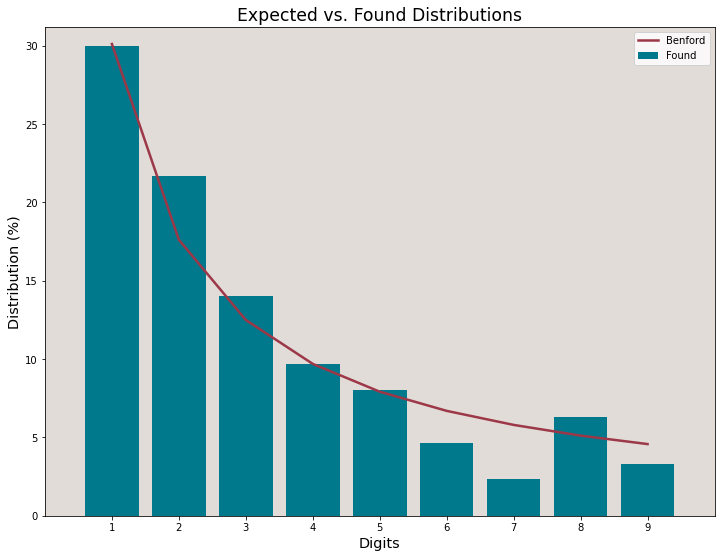

In [13]:
df_bl1 = bf.first_digits(df['Gross Amount'], digs=1)

In [14]:
df_bl1

Counts     Found  Expected
First_1_Dig                            
1                90  0.300000  0.301030
2                65  0.216667  0.176091
3                42  0.140000  0.124939
4                29  0.096667  0.096910
5                24  0.080000  0.079181
6                14  0.046667  0.066947
7                 7  0.023333  0.057992
8                19  0.063333  0.051153
9                10  0.033333  0.045757

In [15]:
df_bl1['diff'] = df_bl1['Found'] - df_bl1['Expected']

In [16]:
df_bl1.sort_values('diff')

Counts     Found  Expected      diff
First_1_Dig                                      
7                 7  0.023333  0.057992 -0.034659
6                14  0.046667  0.066947 -0.020280
9                10  0.033333  0.045757 -0.012424
1                90  0.300000  0.301030 -0.001030
4                29  0.096667  0.096910 -0.000243
5                24  0.080000  0.079181  0.000819
8                19  0.063333  0.051153  0.012181
3                42  0.140000  0.124939  0.015061
2                65  0.216667  0.176091  0.040575

In [17]:
df_bl1.reset_index().sort_values('First_1_Dig')

First_1_Dig  Counts     Found  Expected      diff
0            1      90  0.300000  0.301030 -0.001030
1            2      65  0.216667  0.176091  0.040575
2            3      42  0.140000  0.124939  0.015061
3            4      29  0.096667  0.096910 -0.000243
4            5      24  0.080000  0.079181  0.000819
5            6      14  0.046667  0.066947 -0.020280
6            7       7  0.023333  0.057992 -0.034659
7            8      19  0.063333  0.051153  0.012181
8            9      10  0.033333  0.045757 -0.012424

I'm just using this to display how the function is working. Basically it will strip out negative signs periods and 0 to find the first valid integer and then it counts them and compares them to the expected instances it takes place

In [18]:
df['Gross Amount'].astype(str).str.replace('-','').str.replace('.','').str.lstrip('0').str[0].value_counts().sort_index()

1    90
2    65
3    42
4    29
5    24
6    14
7     7
8    19
9    10
Name: Gross Amount, dtype: int64

In [19]:
df['first_digit'] = df['Gross Amount'].astype(str).str.replace('-','').str.replace('.','').str.lstrip('0').str[0]

In [20]:
df[df['first_digit'] == '6']

Account Number  Invoice Number       Doc Type  Gross Amount  Sales Tax  \
46           F1512           89046  Z_Credit_Memo        -68.46      -1.60   
60           I9638           89060      Z_Invoice        645.68      35.43   
67           N2514           89067      Z_Invoice        634.52      34.85   
69           P0615           89069      Z_Invoice         63.85       5.26   
81           F3075           89079      Z_Payment        -66.92       2.10   
110          H0615           89406      Z_Invoice        600.55      33.09   
135          F1512           89430      Z_Invoice       6048.77     315.58   
166          W0861           89461      Z_Invoice         62.87       5.21   
179          U3075           89474      Z_Invoice         64.12       5.27   
206          T3525           89500      Z_Invoice       6746.25     351.75   
208          Y0861           89502      Z_Invoice         67.76       5.46   
220          W9875           89515      Z_Invoice       6746.25     351.75   
258          A2460           89553      Z_Invoice        661.04      36.22   
260          L3451           89555      Z_Invoice        612.42      33.70   

     Discount Paid       Date first_digit  
46      -2.29    X   2/5/2020           6  
60      50.61    X   2/7/2020           6  
67      49.78    X   2/7/2020           6  
69       7.51    X   2/7/2020           6  
81       3.00  NaN  2/12/2020           6  
110     47.27  NaN  2/18/2020           6  
135    450.83  NaN   3/3/2020           6  
166      7.44  NaN   3/5/2020           6  
179      7.53  NaN   3/9/2020           6  
206    502.50  NaN  3/21/2020           6  
208      7.80  NaN  3/21/2020           6  
220    502.50  NaN  3/21/2020           6  
258     51.74  NaN  3/27/2020           6  
260     48.14  NaN  3/27/2020           6

If there are not enough valid digits in the value being analyzed it will discard those values from the analysis


Initialized sequence with 300 registries.

Test performed on 300 registries.
Discarded 0 records < 10 after preparation.


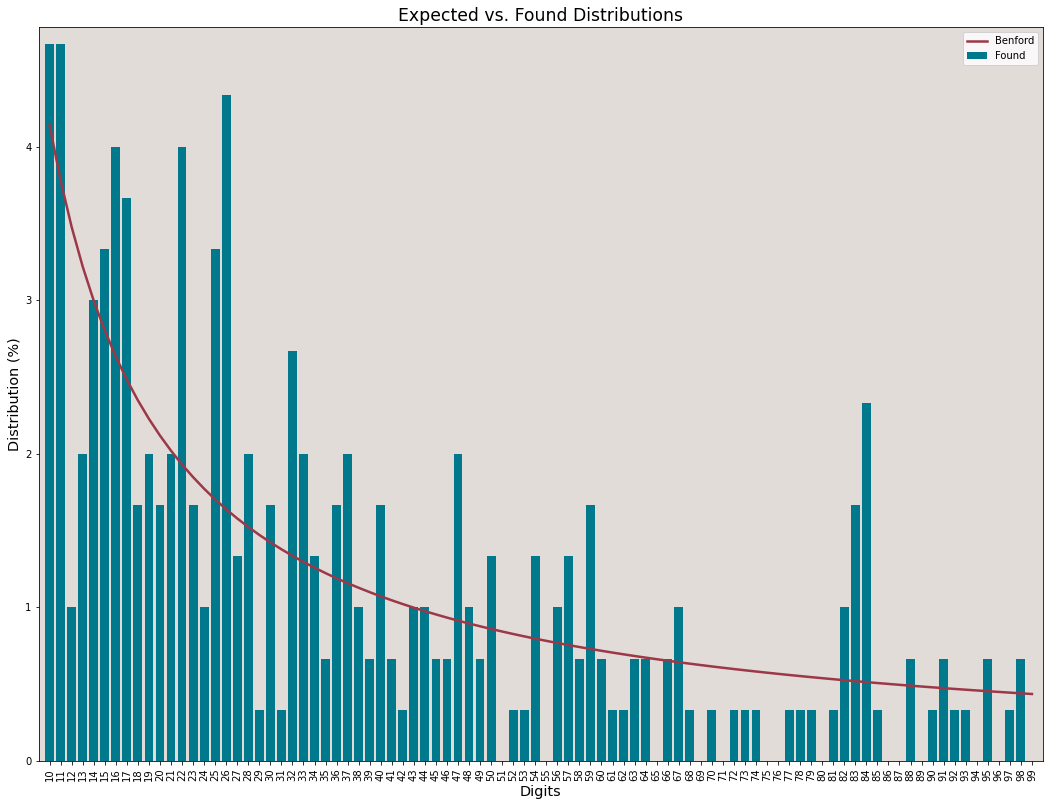

In [21]:
df_bl2 = bf.first_digits(df['Gross Amount'], digs=2)

In [22]:
df_bl2

Counts     Found  Expected
First_2_Dig                            
10             14.0  0.046667  0.041393
11             14.0  0.046667  0.037789
12              3.0  0.010000  0.034762
13              6.0  0.020000  0.032185
14              9.0  0.030000  0.029963
...             ...       ...       ...
95              2.0  0.006667  0.004548
96              0.0  0.000000  0.004501
97              1.0  0.003333  0.004454
98              2.0  0.006667  0.004409
99              0.0  0.000000  0.004365

[90 rows x 3 columns]

In [23]:
df_bl2['diff'] = df_bl2['Found'] - df_bl2['Expected']

In [24]:
df_bl2.sort_values('diff')

Counts     Found  Expected      diff
First_2_Dig                                      
12              3.0  0.010000  0.034762 -0.024762
13              6.0  0.020000  0.032185 -0.012185
29              1.0  0.003333  0.014723 -0.011390
31              1.0  0.003333  0.013788 -0.010455
51              0.0  0.000000  0.008433 -0.008433
...             ...       ...       ...       ...
16             12.0  0.040000  0.026329  0.013671
25             10.0  0.033333  0.017033  0.016300
84              7.0  0.023333  0.005140  0.018194
22             12.0  0.040000  0.019305  0.020695
26             13.0  0.043333  0.016390  0.026943

[90 rows x 4 columns]

In [25]:
df['first_2_digit'] = df['Gross Amount'].astype(str).str.replace('-','').str.replace('.','').str.lstrip('0').str[0:2]

In [26]:
df[df['first_2_digit'] == '23']

Account Number  Invoice Number   Doc Type  Gross Amount  Sales Tax  \
16           V8652           89016  Z_Invoice       2334.00     122.97   
18           X8643           89018  Z_Invoice       2334.00     122.97   
23           X3659           89023  Z_Invoice       2326.40     122.58   
154          P1107           89449  Z_Invoice        237.50      14.26   
244          N2514           89539  Z_Invoice        238.75      14.32   

     Discount Paid       Date first_digit first_2_digit  
16     175.67  NaN  1/21/2020           2            23  
18     175.67  NaN  1/22/2020           2            23  
23     175.11    X  1/23/2020           2            23  
154     20.37  NaN   3/5/2020           2            23  
244     20.46  NaN  3/25/2020           2            23


Initialized sequence with 300 registries.

Test performed on 300 registries.
Discarded 0 records < 100 after preparation.


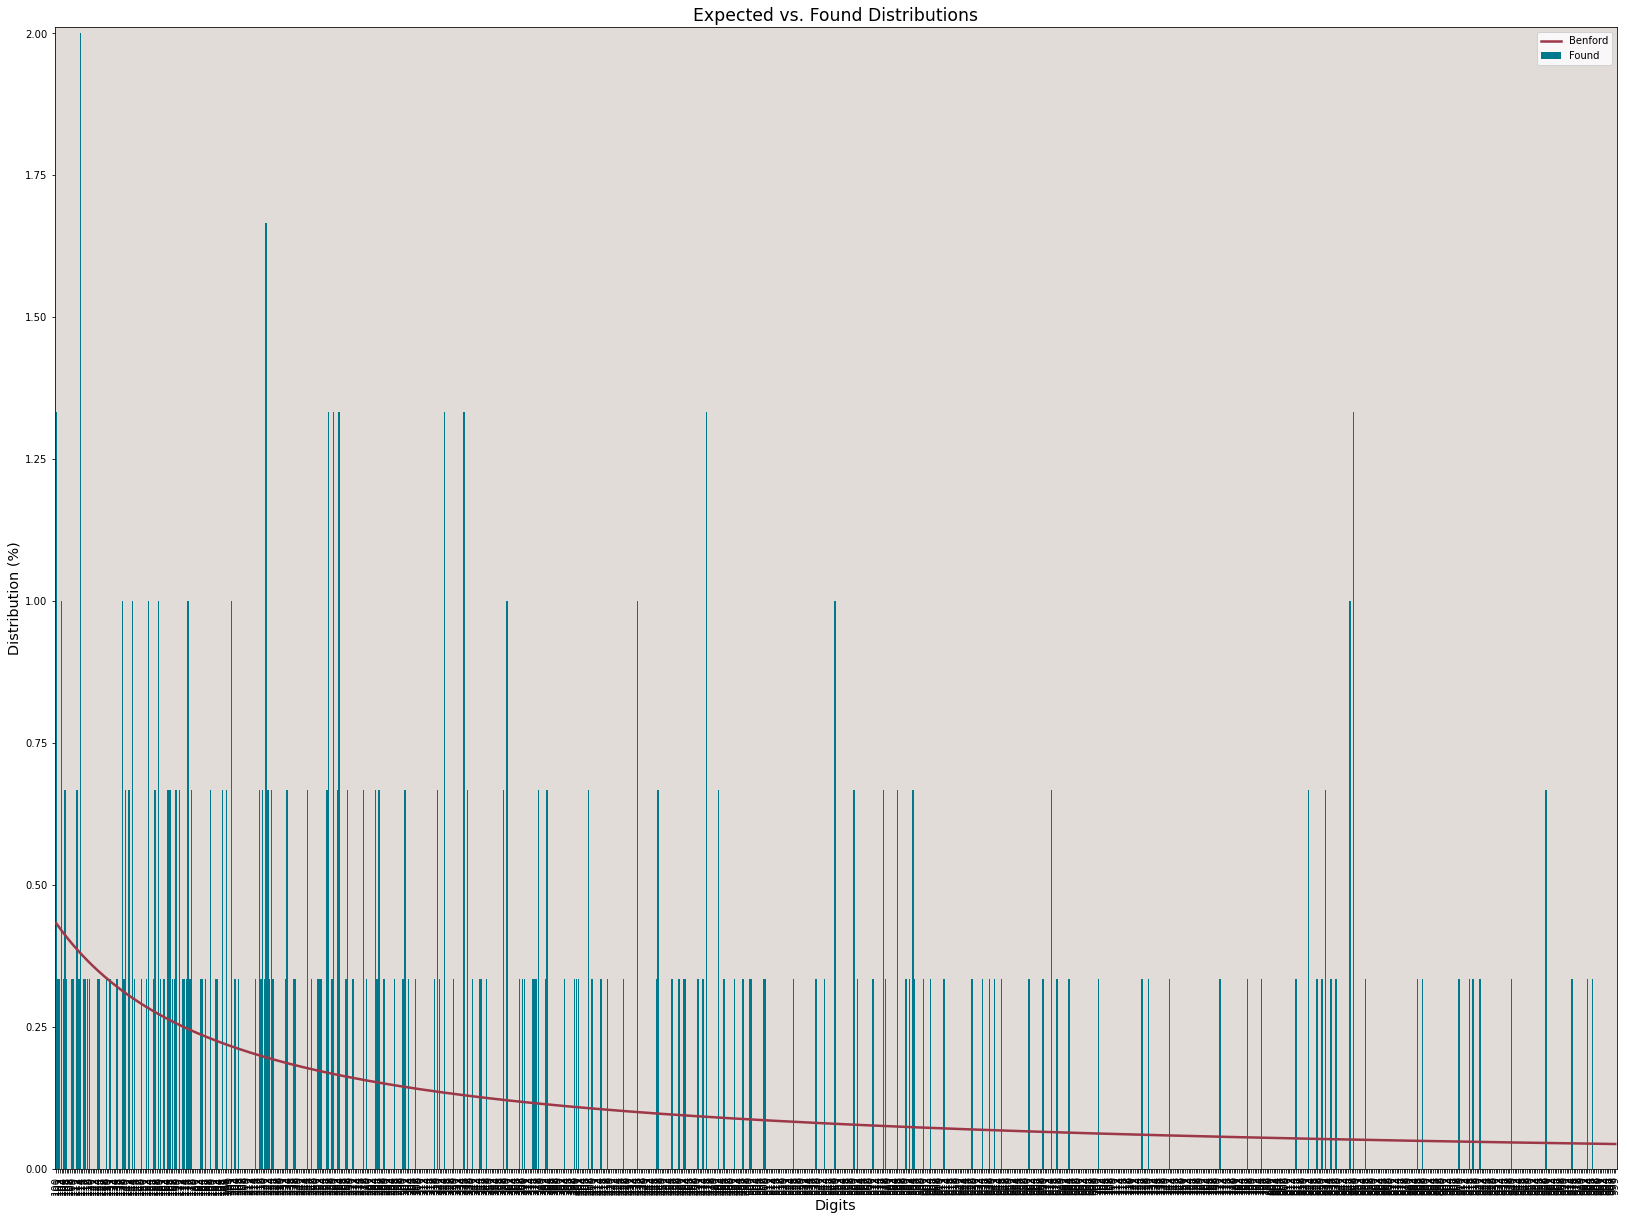

In [27]:
df_bl3 = bf.first_digits(df['Gross Amount'], digs=3)

In [28]:
df_bl3

Counts     Found  Expected
First_3_Dig                            
100             4.0  0.013333  0.004321
101             1.0  0.003333  0.004279
102             1.0  0.003333  0.004237
103             3.0  0.010000  0.004196
104             1.0  0.003333  0.004156
...             ...       ...       ...
995             0.0  0.000000  0.000436
996             0.0  0.000000  0.000436
997             0.0  0.000000  0.000435
998             0.0  0.000000  0.000435
999             0.0  0.000000  0.000435

[900 rows x 3 columns]

In [29]:
df_bl3['diff'] = df_bl3['Found'] - df_bl3['Expected']

In [30]:
df_bl3.sort_values('diff')

Counts     Found  Expected      diff
First_3_Dig                                      
107             0.0  0.000000  0.004040 -0.004040
108             0.0  0.000000  0.004003 -0.004003
111             0.0  0.000000  0.003895 -0.003895
115             0.0  0.000000  0.003760 -0.003760
120             0.0  0.000000  0.003604 -0.003604
...             ...       ...       ...       ...
335             4.0  0.013333  0.001294  0.012039
475             4.0  0.013333  0.000913  0.012420
848             4.0  0.013333  0.000512  0.012821
221             5.0  0.016667  0.001961  0.014706
114             6.0  0.020000  0.003793  0.016207

[900 rows x 4 columns]

In [31]:
df['first_3_digit'] = df['Gross Amount'].astype(str).str.replace('-','').str.replace('.','').str.lstrip('0').str[0:3]

In [32]:
df[df['first_3_digit'] == '234']

Empty DataFrame
Columns: [Account Number, Invoice Number, Doc Type, Gross Amount, Sales Tax, Discount, Paid, Date, first_digit, first_2_digit, first_3_digit]
Index: []

Not displaying the graph seems to save a lot of time on preparing the analysis. So if you don't want it you can set the show_plot to false

In [33]:
df_bl3 = bf.first_digits(df['Gross Amount'], digs=3, show_plot=False)


Initialized sequence with 300 registries.

Test performed on 300 registries.
Discarded 0 records < 100 after preparation.


In [34]:
df_bl3

Counts     Found  Expected
First_3_Dig                            
100             4.0  0.013333  0.004321
101             1.0  0.003333  0.004279
102             1.0  0.003333  0.004237
103             3.0  0.010000  0.004196
104             1.0  0.003333  0.004156
...             ...       ...       ...
995             0.0  0.000000  0.000436
996             0.0  0.000000  0.000436
997             0.0  0.000000  0.000435
998             0.0  0.000000  0.000435
999             0.0  0.000000  0.000435

[900 rows x 3 columns]